# Resampling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


В этом модуле мы снова рассмотрим набор данных "велосипеды"



In [3]:
bikes = pd.read_csv(r'D:\GITHUB\DA_NEW\Datasets\bikes.csv', parse_dates=['date'], index_col='date')
bikes.head()

,temperature,humidity,windspeed,count
date,,,,
2011-01-03,2.716070,45.715346,21.414957,120.0
2011-01-04,2.896673,54.267219,15.136882,108.0
2011-01-05,4.235654,45.697702,17.034578,82.0
2011-01-06,3.112643,50.237349,10.091568,88.0
2011-01-07,2.723918,49.144928,15.738204,148.0


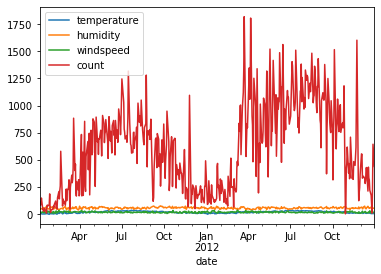

In [4]:
bikes.plot()

На приведенном выше графике трудно увидеть показатели температуры в данных. Постройте график только с температурой в качестве оси Y.

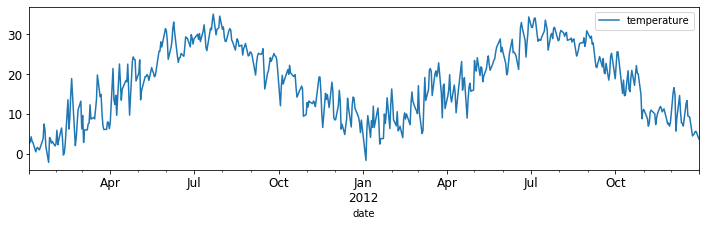

In [5]:
bikes.plot(y='temperature', figsize=(12, 3), fontsize=12)


Из приведенной выше диаграммы видно, что данные охватывают два года и что в оба года наблюдается схожая картина, которую следует ожидать для температур.
Данные могут быть запрошены в соответствии с датами. Например, вы можете агрегировать данные только за январь 2012 года и проверить сумму велосипедов, взятых напрокат в этом месяце. Можете ли вы сравнить это с количеством велосипедов, арендованных в августе?

In [6]:
jan_start = pd.Timestamp("1st January 2012")
jan_end = pd.Timestamp("31st January 2012")
bikes_jan = bikes[jan_start:jan_end]['count'].sum()

aug_start = pd.Timestamp(2012, 8, 1)
aug_end = pd.Timestamp(2012, 8, 31)
bikes_aug = bikes[aug_start:aug_end]['count'].sum()

print("{0:.0f} bikes in January vs {1:.0f} bikes in August.".format(bikes_jan, bikes_aug))

5939 bikes in January vs 37025 bikes in August.


## Resampling

Если ряд имеет небольшое кол-во выбросов, которые влияют на разброс или временной интервал неудобен для анализа. Иногда есть смысл перейти к недельному интервалу из месячного или их годового в месячный, это избавит  от выбросов и уменьшит колебания нашего ряда. В pandas для этого есть удобная функция resample(), в качестве параметров ей передается период округления и аггрегатная функции:

* `.resample`

Агрегируем временные ряды путем повторной выборки точек на более грубом временном уровне.

* Отображение временного ряда `температура` для среднемесячных значений.

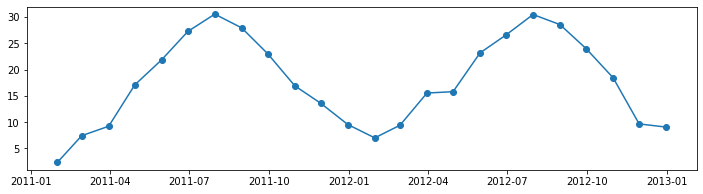

In [7]:
bikes_monthly = bikes.resample('M').mean()

plt.figure(figsize=(12, 3))
plt.plot(bikes_monthly.temperature, "-o")

### Resample по средним значениям каждой недели и для показателя влажность

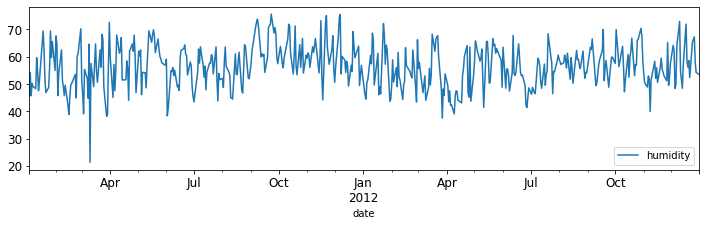

In [8]:
bikes.plot(y='humidity', figsize=(12, 3), fontsize=12)

In [ ]:
bikes_weeks = bikes.resample('W').mean()

plt.figure(figsize=(12, 3))
plt.plot(bikes_weeks.humidity, "-o")

Задание: Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу